<a href="https://colab.research.google.com/github/racheraxx/racheraxx/blob/main/klasifikasi_emosi_bahasa_Sunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')  # ganti nama_file.csv dengan file kamu


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = df.dropna(subset=['data'])

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return ''

df['data_casefolded'] = df['data'].apply(case_folding)

print("Total NaN di 'data':", df['data'].isna().sum())
print("Total NaN di 'data_casefolded':", df['data_casefolded'].isna().sum())

# Lihat hasil 5 baris pertama
df[['data', 'data_casefolded']].head()


Total NaN di 'data': 0
Total NaN di 'data_casefolded': 0


/tmp/ipython-input-4-4074323131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_casefolded'] = df['data'].apply(case_folding)


,data,data_casefolded
2,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa. sing k...
3,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu.. lalakon hirup teh asa nyor...
5,nya prihatin siih tp kedah kitu at pak Bozz ha...,nya prihatin siih tp kedah kitu at pak bozz ha...
6,sae nya kang ai tos ningal kompak kitu teh bin...,sae nya kang ai tos ningal kompak kitu teh bin...
12,rada nyeredet kanu manah ngadangu suara bebele...,rada nyeredet kanu manah ngadangu suara bebele...


In [ ]:
# prompt: buat case folding dari dataset diatas

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

# Applying case folding specifically to the 'data' column
if df is not None and 'data' in df.columns:
    df['data_casefolded'] = df['data'].apply(case_folding)
    print("Case folding applied to the 'data' column.")
    display(df[['data', 'data_casefolded']].head())
else:
    print("DataFrame not loaded or 'data' column not found. Case folding not applied.")

Case folding applied to the 'data' column.


,data,data_casefolded
2,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa. sing k...
3,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu.. lalakon hirup teh asa nyor...
5,nya prihatin siih tp kedah kitu at pak Bozz ha...,nya prihatin siih tp kedah kitu at pak bozz ha...
6,sae nya kang ai tos ningal kompak kitu teh bin...,sae nya kang ai tos ningal kompak kitu teh bin...
12,rada nyeredet kanu manah ngadangu suara bebele...,rada nyeredet kanu manah ngadangu suara bebele...


In [ ]:
# prompt: delete all the punctuation

import string

def remove_punctuation(text):
    if isinstance(text, str):
        # Use translate to remove punctuation
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    return text

# Assuming df is your DataFrame and 'data_no_stopwords' is the column after stopwords removal
if df is not None and 'data_no_stopwords' in df.columns:
    df['data_no_punctuation'] = df['data_no_stopwords'].apply(remove_punctuation)
    print("Punctuation removal applied to the 'data_no_stopwords' column.")
    display(df[['data_no_stopwords', 'data_no_punctuation']].head())
else:
    print("DataFrame not loaded or 'data_no_stopwords' column not found. Punctuation removal not applied.")


Punctuation removal applied to the 'data_no_stopwords' column.


,data_no_stopwords,data_no_punctuation
2,bingah patepang pangerasa . sing katampi kalay...,bingah patepang pangerasa sing katampi kalaya...
3,hariwang .. lalakon hirup nyorangan .. ..,hariwang lalakon hirup nyorangan
5,prihatin siih tp kedah pak bozz hapuntn tos km...,prihatin siih tp kedah pak bozz hapuntn tos km...
6,sae ai tos ningal kompak bingah ningal nage .....,sae ai tos ningal kompak bingah ningal nage ...
12,rada nyeredet kanu manah ngadangu suara bebele...,rada nyeredet kanu manah ngadangu suara bebele...


In [ ]:
# prompt: upload stopword. and do stopword

uploaded_stopwords = files.upload()

import nltk
# Download the required punkt resource
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load stopwords
stopwords_path = next(iter(uploaded_stopwords))
with open(stopwords_path, 'r', encoding='utf-8') as f:
    custom_stopwords = f.read().splitlines()

# Combine NLTK stopwords with custom stopwords
all_stopwords = set(stopwords.words('english')).union(set(custom_stopwords))

def remove_stopwords(text):
    if isinstance(text, str):
        word_tokens = word_tokenize(text)
        filtered_text = [w for w in word_tokens if w.lower() not in all_stopwords]
        return ' '.join(filtered_text)
    return text

# Assuming df is your DataFrame and 'data_casefolded' is the column after case folding
if df is not None and 'data_casefolded' in df.columns:
    df['data_no_stopwords'] = df['data_casefolded'].apply(remove_stopwords)
    print("Stopwords removal applied to the 'data_casefolded' column.")
    display(df[['data_casefolded', 'data_no_stopwords']].head())
else:
    print("DataFrame not loaded or 'data_casefolded' column not found. Stopwords removal not applied.")

Saving stopwordv1.txt to stopwordv1 (2).txt


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords removal applied to the 'data_casefolded' column.


,data_casefolded,data_no_stopwords
2,bingah pisan patepang sareng pangerasa. sing k...,bingah patepang pangerasa . sing katampi kalay...
3,asa hariwang kieu.. lalakon hirup teh asa nyor...,hariwang .. lalakon hirup nyorangan .. ..
5,nya prihatin siih tp kedah kitu at pak bozz ha...,prihatin siih tp kedah pak bozz hapuntn tos km...
6,sae nya kang ai tos ningal kompak kitu teh bin...,sae ai tos ningal kompak bingah ningal nage .....
12,rada nyeredet kanu manah ngadangu suara bebele...,rada nyeredet kanu manah ngadangu suara bebele...


In [ ]:
# prompt: tokenizing

# Download the required punkt resource if not already downloaded
nltk.download('punkt', quiet=True)

def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return []

# Assuming df is your DataFrame and 'data_no_punctuation' is the final processed column
if df is not None and 'data_no_punctuation' in df.columns:
    df['data_tokens'] = df['data_no_punctuation'].apply(tokenize_text)
    print("Tokenization applied to the 'data_no_punctuation' column.")
    display(df[['data_no_punctuation', 'data_tokens']].head())
else:
    print("DataFrame not loaded or 'data_no_punctuation' column not found. Tokenization not applied.")

Tokenization applied to the 'data_no_punctuation' column.


,data_no_punctuation,data_tokens
2,bingah patepang pangerasa sing katampi kalaya...,"[bingah, patepang, pangerasa, sing, katampi, k..."
3,hariwang lalakon hirup nyorangan,"[hariwang, lalakon, hirup, nyorangan]"
5,prihatin siih tp kedah pak bozz hapuntn tos km...,"[prihatin, siih, tp, kedah, pak, bozz, hapuntn..."
6,sae ai tos ningal kompak bingah ningal nage ...,"[sae, ai, tos, ningal, kompak, bingah, ningal,..."
12,rada nyeredet kanu manah ngadangu suara bebele...,"[rada, nyeredet, kanu, manah, ngadangu, suara,..."


In [ ]:
# Gabungkan kembali token jadi teks untuk proses TF-IDF
df['data_for_tfidf'] = df['data_tokens'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Inisialisasi TF-IDF vectorizer untuk 1-gram hingga 4-gram
tfidf = TfidfVectorizer(ngram_range=(1, 4))

# Terapkan TF-IDF pada kolom 'data_for_tfidf' yang sudah berisi token yang digabung
X_tfidf = tfidf.fit_transform(df['data_for_tfidf'])

# Encode label (jika belum)
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])

# Tampilkan informasi hasil TF-IDF
print("✅ TF-IDF 1-gram hingga 4-gram berhasil dibuat.")
print("Jumlah fitur:", len(tfidf.get_feature_names_out()))
print("Contoh fitur:", tfidf.get_feature_names_out()[:10])


✅ TF-IDF 1-gram hingga 4-gram berhasil dibuat.
Jumlah fitur: 29766
Contoh fitur: ['00' '00 panyakit' '00 panyakit kieukieu' '00 panyakit kieukieu yaalah'
 '01' '01 alhamdulillah' '10' '10 keueung' '10 keueung tiiseun' '12']


In [ ]:
# Pastikan label_encoder masih ada dari sebelumnya
from collections import Counter
import pandas as pd

# Dapatkan distribusi label sebelum dan sesudah SMOTE
label_counts_before = Counter(y_encoded)
label_counts_after = Counter(y_smote)

# Dapatkan label asli dari angka encode
label_names = label_encoder.inverse_transform(list(label_counts_before.keys()))

# Buat tabel DataFrame dengan label emosi yang jelas
df_smote_named = pd.DataFrame({
    'Emosi': label_names,
    'Sebelum SMOTE': [label_counts_before[i] for i in label_counts_before.keys()],
    'Sesudah SMOTE': [label_counts_after[i] for i in label_counts_before.keys()]
})

# Tampilkan tabel
print("📊 Jumlah Data per Kelas Emosi Sebelum dan Sesudah SMOTE:")
display(df_smote_named)


📊 Jumlah Data per Kelas Emosi Sebelum dan Sesudah SMOTE:


,Emosi,Sebelum SMOTE,Sesudah SMOTE
0,joy,358,368
1,fear,368,368
2,sadness,301,368
3,anger,345,368


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode label (pastikan 'label' sudah ada)
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Siapkan X dan y
X = df['data_for_tfidf']
y = df['label_encoded']

# Fungsi untuk TF-IDF + SVM dengan variasi n-gram
def train_svm_ngram(ngram_range=(1,1)):
    print(f"\n🔹 Evaluasi SVM dengan TF-IDF {ngram_range[0]}-gram")

    # TF-IDF vektorisasi
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X_vec = tfidf.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

    # Model SVM
    model = LinearSVC()
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Akurasi:", round(accuracy_score(y_test, y_pred), 4))

# Jalankan untuk 1-gram sampai 4-gram
for n in range(1, 5):
    train_svm_ngram(ngram_range=(n, n))



🔹 Evaluasi SVM dengan TF-IDF 1-gram
              precision    recall  f1-score   support

       anger       0.97      0.95      0.96        62
        fear       0.95      0.95      0.95        80
         joy       0.97      0.97      0.97        77
     sadness       0.95      0.96      0.96        56

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275

Akurasi: 0.96

🔹 Evaluasi SVM dengan TF-IDF 2-gram
              precision    recall  f1-score   support

       anger       0.90      0.56      0.69        62
        fear       0.49      0.96      0.65        80
         joy       0.95      0.52      0.67        77
     sadness       0.94      0.61      0.74        56

    accuracy                           0.68       275
   macro avg       0.82      0.66      0.69       275
weighted avg       0.80      0.68      0.68       275

Akurasi: 0.6764

🔹 Evaluasi SVM dengan TF-

🔹 Confusion Matrix for SVM - TF-IDF 1-gram


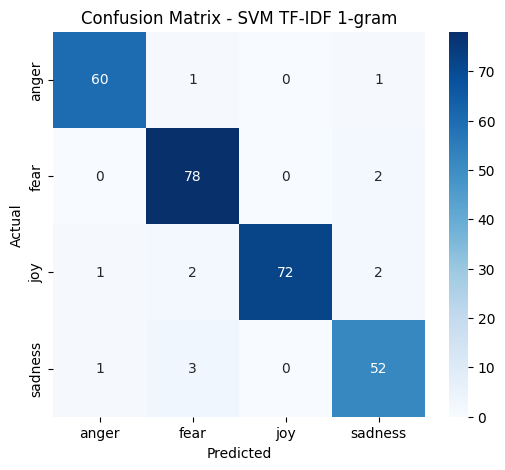

🔹 Confusion Matrix for SVM - TF-IDF 2-gram


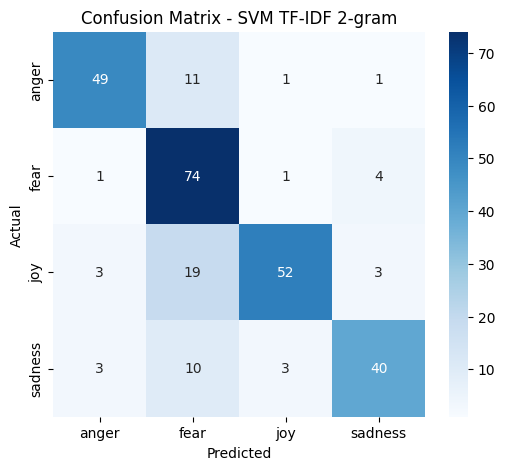

🔹 Confusion Matrix for SVM - TF-IDF 3-gram


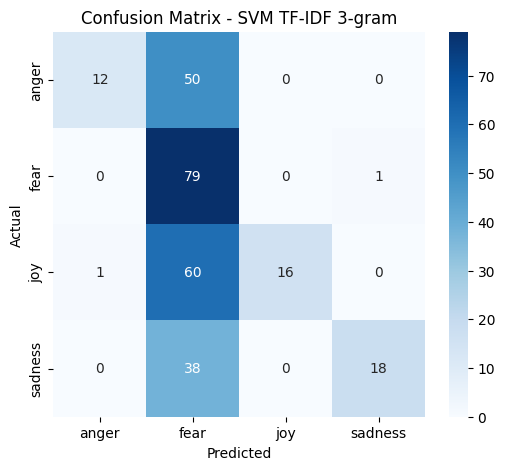

🔹 Confusion Matrix for SVM - TF-IDF 4-gram


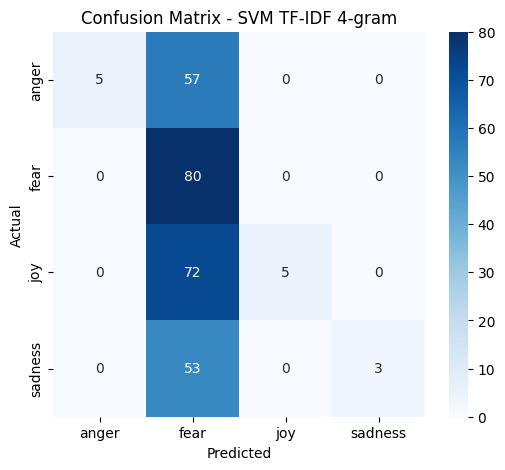

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode label jika belum
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
y = df['label_encoded']
text = df['data_casefolded']  # ubah jika kolommu berbeda

labels = le.classes_

# Loop dari 1-gram sampai 4-gram
for n in range(1, 5):
    print(f"🔹 Confusion Matrix for SVM - TF-IDF {n}-gram")

    # TF-IDF vectorizer
    tfidf = TfidfVectorizer(ngram_range=(n, n), max_features=3000)
    X = tfidf.fit_transform(text)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearSVC()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - SVM TF-IDF {n}-gram")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
!pip install -U imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Pastikan label sudah diencode
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Gabungkan token ke bentuk teks utuh (jika belum)
df['data_for_tfidf'] = df['data_tokens'].apply(lambda tokens: ' '.join(tokens))

X = df['data_for_tfidf']
y = df['label_encoded']

def train_svm_smote(ngram_range=(1,1)):
    print(f"\n🔹 Evaluasi SVM + SMOTE dengan TF-IDF {ngram_range[0]}-gram")

    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X_vec = vectorizer.fit_transform(X)

    # Split sebelum SMOTE (karena SMOTE hanya diterapkan pada data latih)
    X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

    # Terapkan SMOTE ke data latih
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    # Latih model SVM
    model = LinearSVC()
    model.fit(X_train_bal, y_train_bal)

    # Evaluasi di data uji (tanpa balancing)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Akurasi:", round(accuracy_score(y_test, y_pred), 4))

# Jalankan untuk semua n-gram
for n in range(1, 5):
    train_svm_smote(ngram_range=(n, n))



🔹 Evaluasi SVM + SMOTE dengan TF-IDF 1-gram
              precision    recall  f1-score   support

       anger       0.97      0.95      0.96        62
        fear       0.96      0.94      0.95        80
         joy       0.97      0.97      0.97        77
     sadness       0.92      0.96      0.94        56

    accuracy                           0.96       275
   macro avg       0.95      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275

Akurasi: 0.9564

🔹 Evaluasi SVM + SMOTE dengan TF-IDF 2-gram
              precision    recall  f1-score   support

       anger       0.90      0.58      0.71        62
        fear       0.49      0.96      0.65        80
         joy       0.95      0.53      0.68        77
     sadness       0.94      0.61      0.74        56

    accuracy                           0.68       275
   macro avg       0.82      0.67      0.70       275
weighted avg       0.81      0.68      0.69       275

Akurasi: 0.6836

🔹 Evalu

In [ ]:
!pip install -U imbalanced-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


# Label encoder (jika belum dilakukan)
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Gabungkan token jadi teks (jika belum dilakukan)
df['data_for_tfidf'] = df['data_tokens'].apply(lambda tokens: ' '.join(tokens))

X = df['data_for_tfidf']
y = df['label_encoded']

def train_rf_smote(ngram_range=(1,1)):
    print(f"\n🌲 Evaluasi Random Forest + SMOTE - TF-IDF {ngram_range[0]}-gram")

    # TF-IDF
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X_vec = tfidf.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

    # Balancing dengan SMOTE
    sm = SMOTE(random_state=42)
    X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

    # Model Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_bal, y_train_bal)

    # Evaluasi
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Akurasi:", round(accuracy_score(y_test, y_pred), 4))

# Jalankan dari 1-gram sampai 4-gram
for n in range(1, 5):
    train_rf_smote(ngram_range=(n, n))



🌲 Evaluasi Random Forest + SMOTE - TF-IDF 1-gram
              precision    recall  f1-score   support

       anger       0.92      0.95      0.94        62
        fear       0.92      0.95      0.93        80
         joy       0.99      0.88      0.93        77
     sadness       0.90      0.95      0.92        56

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275

Akurasi: 0.9309

🌲 Evaluasi Random Forest + SMOTE - TF-IDF 2-gram
              precision    recall  f1-score   support

       anger       0.97      0.48      0.65        62
        fear       0.43      0.96      0.60        80
         joy       1.00      0.43      0.60        77
     sadness       0.94      0.55      0.70        56

    accuracy                           0.62       275
   macro avg       0.83      0.61      0.63       275
weighted avg       0.82      0.62      0.63       275

Akurasi: 0.621

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Pastikan label sudah diencode (jika belum)
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Gabungkan token (jika masih berupa list)
df['data_for_tfidf'] = df['data_tokens'].apply(lambda tokens: ' '.join(tokens))

# X dan y
X = df['data_for_tfidf']
y = df['label_encoded']

# Fungsi untuk TF-IDF + Random Forest
def train_rf_nonsmote(ngram_range=(1,1)):
    print(f"\n🌲 Evaluasi Random Forest (Non-SMOTE) - TF-IDF {ngram_range[0]}-gram")

    # TF-IDF
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=3000)
    X_vec = tfidf.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

    # Model RF
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Akurasi:", round(accuracy_score(y_test, y_pred), 4))

# Jalankan evaluasi untuk 1-gram sampai 4-gram
for n in range(1, 5):
    train_rf_nonsmote(ngram_range=(n, n))



🌲 Evaluasi Random Forest (Non-SMOTE) - TF-IDF 1-gram
              precision    recall  f1-score   support

       anger       0.92      0.94      0.93        62
        fear       0.93      0.95      0.94        80
         joy       0.97      0.91      0.94        77
     sadness       0.91      0.95      0.93        56

    accuracy                           0.93       275
   macro avg       0.93      0.94      0.93       275
weighted avg       0.94      0.93      0.93       275

Akurasi: 0.9345

🌲 Evaluasi Random Forest (Non-SMOTE) - TF-IDF 2-gram
              precision    recall  f1-score   support

       anger       0.97      0.48      0.65        62
        fear       0.43      0.96      0.60        80
         joy       1.00      0.43      0.60        77
     sadness       0.94      0.55      0.70        56

    accuracy                           0.62       275
   macro avg       0.83      0.61      0.63       275
weighted avg       0.82      0.62      0.63       275

Akuras

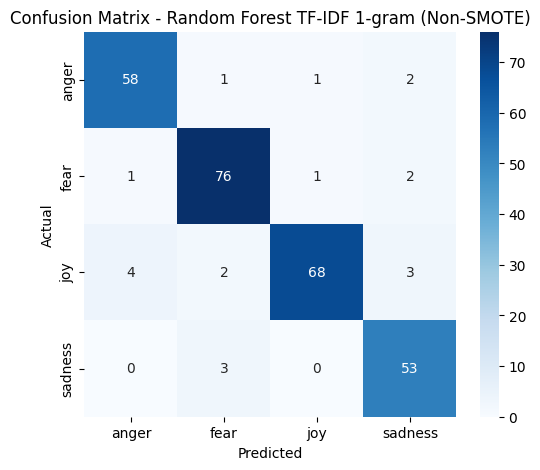

In [ ]:
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# 2. Label Encoding (jika belum dilakukan)
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# 3. TF-IDF 1-gram
tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=3000)
X = tfidf.fit_transform(df['data_casefolded'])  # Pastikan kolom ini adalah data bersih
y = df['label_encoded']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 6. Predict
y_pred = rf.predict(X_test)

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest TF-IDF 1-gram (Non-SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd

# Buat data klasifikasi ringkasan
results = [
    {'Model': 'SVM', 'SMOTE': 'No', 'N-Gram': '1-gram', 'Accuracy': 0.9702, 'F1-Ang': 0.96, 'F1-Fea': 0.98, 'F1-Joy': 0.98, 'F1-Sad': 0.95},
    {'Model': 'SVM', 'SMOTE': 'No', 'N-Gram': '2-gram', 'Accuracy': 0.7500, 'F1-Ang': 0.81, 'F1-Fea': 0.67, 'F1-Joy': 0.75, 'F1-Sad': 0.80},
    {'Model': 'SVM', 'SMOTE': 'No', 'N-Gram': '3-gram', 'Accuracy': 0.3968, 'F1-Ang': 0.25, 'F1-Fea': 0.44, 'F1-Joy': 0.41, 'F1-Sad': 0.37},
    {'Model': 'SVM', 'SMOTE': 'No', 'N-Gram': '4-gram', 'Accuracy': 0.2877, 'F1-Ang': 0.11, 'F1-Fea': 0.40, 'F1-Joy': 0.16, 'F1-Sad': 0.07},
    {'Model': 'Random Forest', 'SMOTE': 'No', 'N-Gram': '1-gram', 'Accuracy': 0.9345, 'F1-Ang': 0.93, 'F1-Fea': 0.94, 'F1-Joy': 0.94, 'F1-Sad': 0.93},
    {'Model': 'Random Forest', 'SMOTE': 'No', 'N-Gram': '2-gram', 'Accuracy': 0.6218, 'F1-Ang': 0.65, 'F1-Fea': 0.60, 'F1-Joy': 0.60, 'F1-Sad': 0.70},
    {'Model': 'Random Forest', 'SMOTE': 'No', 'N-Gram': '3-gram', 'Accuracy': 0.3818, 'F1-Ang': 0.15, 'F1-Fea': 0.48, 'F1-Joy': 0.19, 'F1-Sad': 0.35},
    {'Model': 'Random Forest', 'SMOTE': 'No', 'N-Gram': '4-gram', 'Accuracy': 0.3091, 'F1-Ang': 0.06, 'F1-Fea': 0.46, 'F1-Joy': 0.03, 'F1-Sad': 0.07},
    {'Model': 'Random Forest', 'SMOTE': 'Yes', 'N-Gram': '1-gram', 'Accuracy': 0.9309, 'F1-Ang': 0.94, 'F1-Fea': 0.93, 'F1-Joy': 0.93, 'F1-Sad': 0.92},
    {'Model': 'Random Forest', 'SMOTE': 'Yes', 'N-Gram': '2-gram', 'Accuracy': 0.6218, 'F1-Ang': 0.65, 'F1-Fea': 0.60, 'F1-Joy': 0.60, 'F1-Sad': 0.70},
    {'Model': 'Random Forest', 'SMOTE': 'Yes', 'N-Gram': '3-gram', 'Accuracy': 0.3818, 'F1-Ang': 0.15, 'F1-Fea': 0.48, 'F1-Joy': 0.19, 'F1-Sad': 0.35},
    {'Model': 'Random Forest', 'SMOTE': 'Yes', 'N-Gram': '4-gram', 'Accuracy': 0.3091, 'F1-Ang': 0.06, 'F1-Fea': 0.46, 'F1-Joy': 0.03, 'F1-Sad': 0.07},
]

# Tampilkan DataFrame langsung di output
df_result = pd.DataFrame(results)
df_result.style.set_caption("Tabel Ringkasan Hasil Klasifikasi Emosi").format({
    'Accuracy': "{:.4f}",
    'F1-Ang': "{:.2f}",
    'F1-Fea': "{:.2f}",
    'F1-Joy': "{:.2f}",
    'F1-Sad': "{:.2f}"
})



,Model,SMOTE,N-Gram,Accuracy,F1-Ang,F1-Fea,F1-Joy,F1-Sad
0,SVM,No,1-gram,0.9702,0.96,0.98,0.98,0.95
1,SVM,No,2-gram,0.7500,0.81,0.67,0.75,0.80
2,SVM,No,3-gram,0.3968,0.25,0.44,0.41,0.37
3,SVM,No,4-gram,0.2877,0.11,0.40,0.16,0.07
4,Random Forest,No,1-gram,0.9345,0.93,0.94,0.94,0.93
5,Random Forest,No,2-gram,0.6218,0.65,0.60,0.60,0.70
6,Random Forest,No,3-gram,0.3818,0.15,0.48,0.19,0.35
7,Random Forest,No,4-gram,0.3091,0.06,0.46,0.03,0.07
8,Random Forest,Yes,1-gram,0.9309,0.94,0.93,0.93,0.92
9,Random Forest,Yes,2-gram,0.6218,0.65,0.60,0.60,0.70


In [ ]:
# ✅ 1. Install library yang dibutuhkan
!pip install -q imbalanced-learn scikit-learn seaborn

# ✅ 2. Upload file dataset
from google.colab import files
uploaded = files.upload()

# ✅ 3. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# ✅ 4. Load dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, quotechar='"')
df = df[['label', 'data']].dropna()
df['data'] = df['data'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
import re
df['data_no_punctuation'] = df['data'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
# ✅ 5. Encode label dan siapkan list hasil
label_encoder = LabelEncoder()
df['label_enc'] = label_encoder.fit_transform(df['label'])

results = []

# ✅ 6. Loop: n-gram dari 1–4 + model SVM dan Random Forest + SMOTE & Non-SMOTE
for n in range(1, 5):
    print(f"\n=== Evaluasi TF-IDF {n}-gram ===")

    tfidf = TfidfVectorizer(ngram_range=(n, n))

    # ✅ GUNAKAN KOLOM HASIL PREPROCESSING
    X_vec = tfidf.fit_transform(df['data_no_punctuation'])  # ganti sesuai kolommu
    y = df['label']
    y_enc = df['label_enc']

    for smote_flag in [False, True]:
        smote_status = 'SMOTE' if smote_flag else 'Non-SMOTE'

        if smote_flag:
            try:
                sm = SMOTE(k_neighbors=1, random_state=42)
                X_bal, y_bal = sm.fit_resample(X_vec, y_enc)
                y_labels = label_encoder.inverse_transform(y_bal)
            except Exception as e:
                print(f"⚠️ Gagal SMOTE pada {n}-gram: {e}")
                continue
        else:
            X_bal, y_bal = X_vec, y
            y_labels = y

        X_train, X_test, y_train, y_test = train_test_split(
            X_bal, y_bal, test_size=0.2, random_state=42
        )
        y_test_labels = label_encoder.inverse_transform(y_test) if smote_flag else y_test

        models = {
            'SVM': LinearSVC(),
            'Random Forest': RandomForestClassifier(random_state=42)
        }

        for model_name, model in models.items():
            try:
                print(f"🔄 Melatih {model_name} | {n}-gram | {smote_status}")
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                y_pred_labels = label_encoder.inverse_transform(y_pred) if smote_flag else y_pred

                for label in np.unique(y_test_labels):
                    precision = precision_score(y_test_labels, y_pred_labels, labels=[label], average='macro') * 100
                    recall = recall_score(y_test_labels, y_pred_labels, labels=[label], average='macro') * 100
                    f1 = f1_score(y_test_labels, y_pred_labels, labels=[label], average='macro') * 100
                    acc = accuracy_score(y_test_labels, y_pred_labels) * 100

                    results.append({
                        'n-gram': f'{n}-gram',
                        'model': model_name,
                        'smote': smote_status,
                        'emosi': label,
                        'precision (%)': round(precision, 2),
                        'recall (%)': round(recall, 2),
                        'f1-score (%)': round(f1, 2),
                        'akurasi (%)': round(acc, 2)
                    })

            except Exception as e:
                print(f"❌ Gagal melatih {model_name} | {n}-gram | {smote_status}")
                print("Error:", str(e))


# ✅ 7. Tampilkan hasil dalam tabel
results_df = pd.DataFrame(results)
print("\n📊 Hasil Klasifikasi Lengkap:")
results_df



Saving data.csv to data (2).csv

=== Evaluasi TF-IDF 1-gram ===
🔄 Melatih SVM | 1-gram | Non-SMOTE
🔄 Melatih Random Forest | 1-gram | Non-SMOTE
🔄 Melatih SVM | 1-gram | SMOTE
🔄 Melatih Random Forest | 1-gram | SMOTE

=== Evaluasi TF-IDF 2-gram ===
🔄 Melatih SVM | 2-gram | Non-SMOTE
🔄 Melatih Random Forest | 2-gram | Non-SMOTE
🔄 Melatih SVM | 2-gram | SMOTE
🔄 Melatih Random Forest | 2-gram | SMOTE

=== Evaluasi TF-IDF 3-gram ===
🔄 Melatih SVM | 3-gram | Non-SMOTE
🔄 Melatih Random Forest | 3-gram | Non-SMOTE
🔄 Melatih SVM | 3-gram | SMOTE
🔄 Melatih Random Forest | 3-gram | SMOTE

=== Evaluasi TF-IDF 4-gram ===
🔄 Melatih SVM | 4-gram | Non-SMOTE
🔄 Melatih Random Forest | 4-gram | Non-SMOTE


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔄 Melatih SVM | 4-gram | SMOTE
🔄 Melatih Random Forest | 4-gram | SMOTE

📊 Hasil Klasifikasi Lengkap:


,n-gram,model,smote,emosi,precision (%),recall (%),f1-score (%),akurasi (%)
0,1-gram,SVM,Non-SMOTE,anger,93.65,95.16,94.40,94.18
1,1-gram,SVM,Non-SMOTE,fear,92.86,97.50,95.12,94.18
2,1-gram,SVM,Non-SMOTE,joy,98.61,92.21,95.30,94.18
3,1-gram,SVM,Non-SMOTE,sadness,91.07,91.07,91.07,94.18
4,1-gram,Random Forest,Non-SMOTE,anger,93.65,95.16,94.40,91.64
...,...,...,...,...,...,...,...,...
59,4-gram,SVM,SMOTE,sadness,28.83,100.00,44.76,33.90
60,4-gram,Random Forest,SMOTE,anger,100.00,9.86,17.95,36.27
61,4-gram,Random Forest,SMOTE,fear,29.32,100.00,45.35,36.27
62,4-gram,Random Forest,SMOTE,joy,100.00,10.45,18.92,36.27
